## Certification Project Statement - FMCG
New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.

The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables. Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance.

## Importing the libraries and data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.decomposition as PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)
plt.style.use('ggplot')

import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# 1st Step
df = pd.read_csv("fmcg_sales_data.csv", index_col = 0, thousands=',')
df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


## Data Preprocessing

In [7]:
# 2nd Step
# Adding the column name to index column as it is having country names
df.index.names = ['Country']
df.head(1)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238


In [8]:
# 3rd Step
# Checking if there is missing value in data set
df.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

## Exploratory Data Analysis

In [9]:
# 4th Step
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


In [22]:
for col in df.columns:
    print("Top importer of year {} is => {}".format(col, list(df[df['1990']==max(df['1990'])].index)[0]))

Top importer of year 1990 is => Djibouti
Top importer of year 1991 is => Djibouti
Top importer of year 1992 is => Djibouti
Top importer of year 1993 is => Djibouti
Top importer of year 1994 is => Djibouti
Top importer of year 1995 is => Djibouti
Top importer of year 1996 is => Djibouti
Top importer of year 1997 is => Djibouti
Top importer of year 1998 is => Djibouti
Top importer of year 1999 is => Djibouti
Top importer of year 2000 is => Djibouti
Top importer of year 2001 is => Djibouti
Top importer of year 2002 is => Djibouti
Top importer of year 2003 is => Djibouti
Top importer of year 2004 is => Djibouti
Top importer of year 2005 is => Djibouti
Top importer of year 2006 is => Djibouti
Top importer of year 2007 is => Djibouti


<Figure size 1500x1200 with 0 Axes>

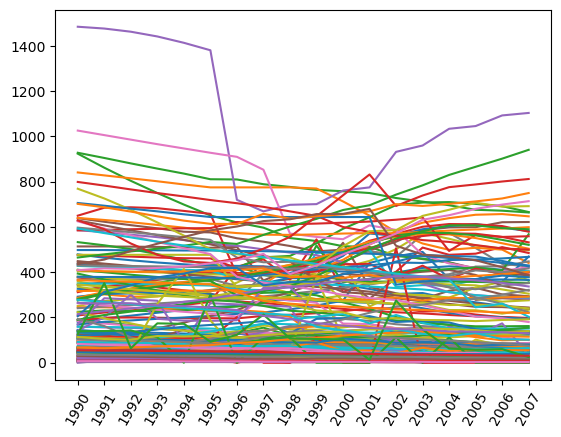

<Figure size 1500x1200 with 0 Axes>

In [10]:
country_list = list(df.index)
year_list = list(df.iloc[:,0:].columns)
for ex in country_list:
    yearly_export = []
    for yr in year_list:
        yearly_export.append(df[yr][df.index == ex].sum())
    plt.plot(yearly_export, label = ex)
plt.xticks(np.arange(18), tuple(year_list), rotation=60)
plt.figure(figsize=(15,12))

<Figure size 1500x1200 with 0 Axes>

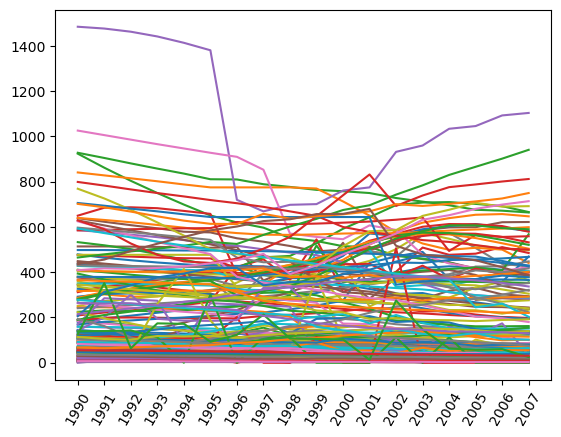

<Figure size 1500x1200 with 0 Axes>

In [11]:
country_list = list(df.index)
year_list = list(df.columns)
for ex in country_list:
    yearly_export = []
    for yr in year_list:
        yearly_export.append(df[yr][ex].sum())
    plt.plot(yearly_export, label = ex)
plt.xticks(np.arange(18), tuple(year_list), rotation=60)
plt.figure(figsize=(15,12))

In [24]:
# 5th Step & 6th Step

data = pd.read_csv("fmcg_sales_data.csv", index_col = 0, thousands=',')
data.index.names = ['Country']
data.columns.names = ['Years']

data.head(1)

Years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238


## Principal Component Analysis

In [26]:
pca = PCA(n_components=2)

data.index.names = ['Country']

pca.fit(data)

existing_data = pca.transform(data)
existing_data_2d = pd.DataFrame(existing_data)
existing_data_2d.index = data.index
existing_data_2d.columns = ['PC1','PC2']
existing_data_2d.head()

,PC1,PC2
Country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [27]:
print (pca.explained_variance_ratio_)

[0.91808789 0.060556  ]


## K-Means Clustering

Text(0, 0.5, 'WCSS')

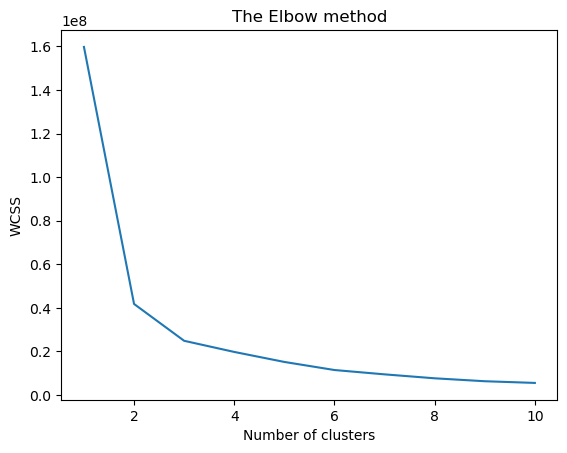

In [30]:
# 7th Step

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=11)
    kmeans.fit(existing_data_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [32]:
# 8th Step

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=11)
y_kmeans = kmeans.fit_predict(data)

In [34]:
X = data.values

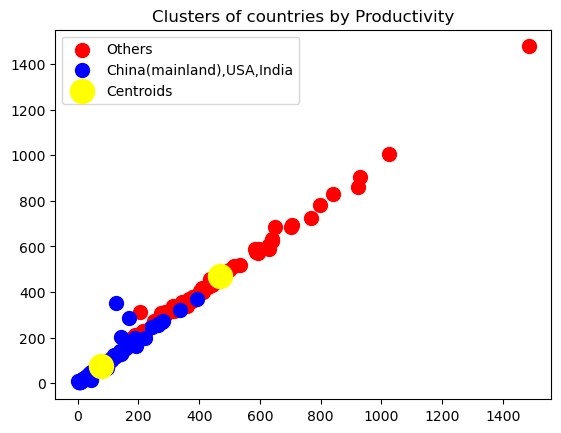

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100, c='red', label='Others')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=100, c='blue', label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()

In [36]:
kmeans.cluster_centers_

array([[469.15625   , 468.21875   , 463.125     , 458.671875  ,
        454.609375  , 451.71875   , 429.671875  , 430.15625   ,
        427.046875  , 439.8125    , 445.03125   , 450.828125  ,
        447.15625   , 453.234375  , 447.046875  , 442.828125  ,
        437.765625  , 435.90625   ],
       [ 75.14685315,  74.84615385,  71.83216783,  71.45454545,
         69.72727273,  69.88811189,  66.66433566,  69.45454545,
         66.71328671,  64.40559441,  57.7972028 ,  55.6013986 ,
         59.73426573,  52.51048951,  51.68531469,  49.60839161,
         48.74125874,  47.02097902]])

In [37]:
print (kmeans.labels_)
print (len(kmeans.labels_))
print (type(kmeans.labels_))

[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0]
207
<class 'numpy.ndarray'>


In [38]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 64, 1: 143}


In [39]:
data['xa'] = existing_data_2d.PC1
data['ya'] = existing_data_2d.PC2

In [40]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 64, 1: 143}


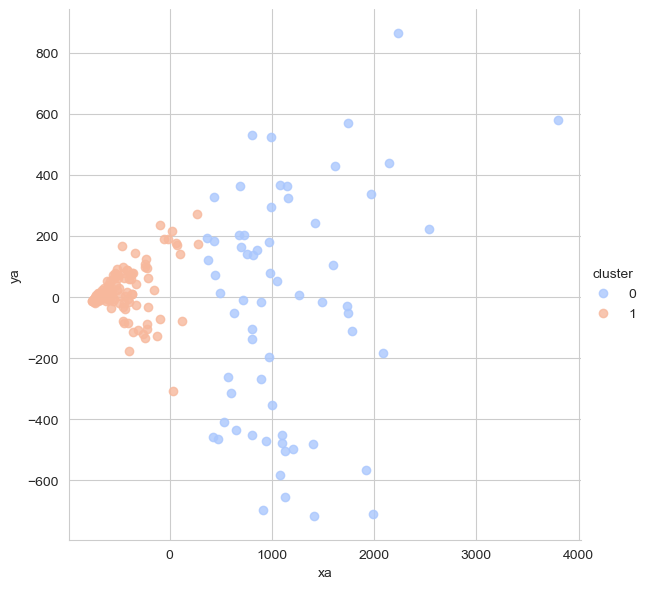

In [44]:
data['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='xa', y='ya', data=data, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [46]:
list1 = list(data.index)[0:207]
list1

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Cote d'Ivoire",
 'Korea, Dem. Rep.',
 'Congo, Dem. Rep.',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gamb

In [47]:
len(data.index)

207

In [77]:
existing_data_2d
f1 = existing_data_2d['PC1'].values
f2 = existing_data_2d['PC2'].values

fb = f1[0:30]
fg = f2[0:30]

X = np.array(list(zip(fb, fg)))
Z = linkage(X, 'average')

fig = plt.figure(figsize = (15,12))
dn = dendrogram(Z, labels=list1, leaf_rotation=90)

ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1500x1200 with 0 Axes>

In [69]:
len(list1)

207

In [76]:
Z = Z.transpose()

In [72]:
len(Z.transpose())

4

In [73]:
Z.shape

(29, 4)

In [74]:
Z.transpose().shape

(4, 29)

In [53]:
list1

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Cote d'Ivoire",
 'Korea, Dem. Rep.',
 'Congo, Dem. Rep.',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gamb

In [78]:
Z = linkage(X, 'single')
fig = plt.figure(figsize = (15,12))
dn = dendrogram(Z, labels=list1, leaf_rotation=90)

ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1500x1200 with 0 Axes>